In [1]:
!pip install sympy

In [2]:
import sympy as sp

# Define symbolic variables
EI, l, ξ = sp.symbols('EI l ξ')

# Define the shape functions matrix Be
Be = sp.Matrix([[6*ξ, (3*ξ-1)*l, -6*ξ, (3*ξ+1)*l]]) / l**2

# Compute the stiffness matrix Ke
Ke = (EI*l/2) * sp.integrate(Be.T @ Be, (ξ, -1, 1))
Ke = sp.simplify(Ke)

# Print Ke for prismatic beam
print("Ke for prismatic beam:")
sp.pprint(Ke, use_unicode=True)

# Print Ke in Python format
print("\nKe in Python format:")
print(sp.python(Ke))


Ke for prismatic beam:
⎡ 12⋅EI    6⋅EI   -12⋅EI    6⋅EI ⎤
⎢ ─────    ────   ───────   ──── ⎥
⎢    3       2        3       2  ⎥
⎢   l       l        l       l   ⎥
⎢                                ⎥
⎢ 6⋅EI     4⋅EI   -6⋅EI     2⋅EI ⎥
⎢ ────     ────   ──────    ──── ⎥
⎢   2       l        2       l   ⎥
⎢  l                l            ⎥
⎢                                ⎥
⎢-12⋅EI   -6⋅EI    12⋅EI   -6⋅EI ⎥
⎢───────  ──────   ─────   ──────⎥
⎢    3       2        3       2  ⎥
⎢   l       l        l       l   ⎥
⎢                                ⎥
⎢ 6⋅EI     2⋅EI   -6⋅EI     4⋅EI ⎥
⎢ ────     ────   ──────    ──── ⎥
⎢   2       l        2       l   ⎥
⎣  l                l            ⎦

Ke in Python format:
EI = Symbol('EI')
l = Symbol('l')
e = ImmutableDenseMatrix([[12*EI/l**3, 6*EI/l**2, -12*EI/l**3, 6*EI/l**2], [6*EI/l**2, 4*EI/l, -6*EI/l**2, 2*EI/l], [-12*EI/l**3, -6*EI/l**2, 12*EI/l**3, -6*EI/l**2], [6*EI/l**2, 2*EI/l, -6*EI/l**2, 4*EI/l]])


In [3]:
import sympy as sp

# Define symbolic variables
q, l, ξ = sp.symbols('q l ξ')

# Define the shape functions matrix Ne
Ne = sp.Matrix([
    [2*(1-ξ)**2*(2+ξ), (1-ξ)**2*(1+ξ)*l, 2*(1+ξ)**2*(2-ξ), -(1+ξ)**2*(1-ξ)*l]
]) / 8

# Compute the equivalent nodal forces fe
fe = (q*l/2) * sp.integrate(Ne, (ξ, -1, 1))
fe = sp.simplify(fe)

# Print fe^T for uniform load q
print("fe^T for uniform load q:")
sp.pprint(fe, use_unicode=True)


fe^T for uniform load q:
⎡      2           2   ⎤
⎢l⋅q  l ⋅q  l⋅q  -l ⋅q ⎥
⎢───  ────  ───  ──────⎥
⎣ 2    12    2     12  ⎦


In [5]:
import numpy as np

def TimoshenkoBeamStiffness(Le, EI, Φ):
    Ke = EI / (Le * (1 + Φ)) * np.array([
        [12 / Le**2, 6 / Le, -12 / Le**2, 6 / Le],
        [6 / Le, 4 + Φ, -6 / Le, 2 - Φ],
        [-12 / Le**2, -6 / Le, 12 / Le**2, -6 / Le],
        [6 / Le, 2 - Φ, -6 / Le, 4 + Φ]
    ])
    return Ke
    # Define inputs
Le = 5.0  # Example value for length
EI = 10.0  # Example value for bending stiffness
Φ = 0.2  # Example value for Φ

# Calculate the stiffness matrix
Ke = TimoshenkoBeamStiffness(Le, EI, Φ)

# Print the stiffness matrix
print("Stiffness Matrix Ke:")
print(Ke)



Stiffness Matrix Ke:
[[ 0.8  2.  -0.8  2. ]
 [ 2.   7.  -2.   3. ]
 [-0.8 -2.   0.8 -2. ]
 [ 2.   3.  -2.   7. ]]


In [6]:
import numpy as np

def TimoshenkoWinklerStiffness(Le, kF, Φ):
    KeW = np.array([
        [4*(78+147*Φ+70*Φ**2), Le*(44+77*Φ+35*Φ**2), 4*(27+63*Φ+35*Φ**2), -Le*(26+63*Φ+35*Φ**2)],
        [Le*(44+77*Φ+35*Φ**2), Le**2*(8+14*Φ+7*Φ**2), Le*(26+63*Φ+35*Φ**2), -Le**2*(6+14*Φ+7*Φ**2)],
        [4*(27+63*Φ+35*Φ**2), Le*(26+63*Φ+35*Φ**2), 4*(78+147*Φ+70*Φ**2), -Le*(44+77*Φ+35*Φ**2)],
        [-Le*(26+63*Φ+35*Φ**2), -Le**2*(6+14*Φ+7*Φ**2), -Le*(44+77*Φ+35*Φ**2), Le**2*(8+14*Φ+7*Φ**2)]
    ]) * kF * Le / (840 * (1 + Φ)**2)
    return KeW
# Define inputs
Le = 5.0  # Example value for length
kF = 1000.0  # Example value for foundation stiffness
Φ = 0.2  # Example value for Φ

# Calculate the stiffness matrix
KeW = TimoshenkoWinklerStiffness(Le, kF, Φ)

# Print the stiffness matrix
print("Stiffness Matrix KeW:")
print(KeW)


Stiffness Matrix KeW:
[[ 1822.08994709  1256.61375661   677.91005291  -826.71957672]
 [ 1256.61375661  1145.00661376   826.71957672  -938.32671958]
 [  677.91005291   826.71957672  1822.08994709 -1256.61375661]
 [ -826.71957672  -938.32671958 -1256.61375661  1145.00661376]]


In [ ]:
#Here's the equivalent Python code for the TimoshenkoWinklerStiffness function using NumPy

In [ ]:
#Make sure to replace the example values with the actual values you want to use. This code snippet calculates the stiffness matrix KeW and prints it to the console.

In [12]:
import sympy as sp

# Define symbolic variables
EI, kF, Le, χ, q0, x = sp.symbols('EI kF Le χ q0 x')
g = 2 - sp.cos(2*χ) - sp.cosh(2*χ)

Nf = [
    sp.exp(χ*x/Le) * sp.sin(χ*x/Le),
    sp.exp(χ*x/Le) * sp.cos(χ*x/Le),
    sp.exp(-χ*x/Le) * sp.sin(χ*x/Le),
    sp.exp(-χ*x/Le) * sp.cos(χ*x/Le)
]

Nfd = [sp.diff(N, x) for N in Nf]
Nfdd = [sp.diff(N, x) for N in Nfd]

KgF = kF * sp.integrate(sp.Matrix(Nf).T @ sp.Matrix(Nf), (x, 0, Le))
KgB = EI * sp.integrate(sp.Matrix(Nfdd).T @ sp.Matrix(Nfdd), (x, 0, Le))
fg = q0 * sp.integrate(sp.Matrix(Nf), (x, 0, Le))

KgF, KgB, fg = [sp.simplify(mat) for mat in [KgF, KgB, fg]]

print("KgF=")
sp.pprint(KgF, use_unicode=True)
print("KgB=")
sp.pprint(KgB, use_unicode=True)

GF = [N.subs(x, 0) for N in Nf] + [N.subs(x, Le) for N in Nf]
HF = sp.Matrix([[sp.simplify(1/GFij) for GFij in GF]])
HFT = HF.T

print("GF=")
sp.pprint(GF, use_unicode=True)
print("HF=")
sp.pprint(HF, use_unicode=True)

facB = (EI*χ/Le**3) / (4*g**2)
facF = (kF*Le) / (16*χ**3*g**2)

KeB = HFT @ KgB @ HF
KeBfac = sp.simplify(KeB / facB)

print("KeB =", facB, " * ")
sp.pprint(KeBfac, use_unicode=True)

KeF = HFT @ KgF @ HF
KeFfac = sp.simplify(KeF / facF)

print("KeF =", facF, " * ")
sp.pprint(KeFfac, use_unicode=True)

facf = (q0*Le) / (χ**2*g)
# Transpose fg to make it a column vector
fg = sp.Matrix(fg).T
fe = sp.simplify(HFT @ fg)
fefac = sp.simplify(fe / facf)

print("fe =", facf, " * ")
sp.pprint(fefac, use_unicode=True)


KgF=
⎡⎧Le⋅kF⋅sinh(2⋅χ)                                                             
⎢⎪───────────────  for (χ > -∞ ∨ χ > 0) ∧ (χ > -∞ ∨ χ < ∞) ∧ (χ > 0 ∨ χ < 0) ∧
⎢⎨       χ                                                                    
⎢⎪                                                                            
⎣⎩    2⋅Le⋅kF                                       otherwise                 

                ⎤
 (χ < 0 ∨ χ < ∞)⎥
                ⎥
                ⎥
                ⎦
KgB=
⎡⎧      3                                                                     
⎢⎪4⋅EI⋅χ ⋅sinh(2⋅χ)                                                           
⎢⎪─────────────────  for (χ > -∞ ∨ χ > 0) ∧ (χ > -∞ ∨ χ < ∞) ∧ (χ > 0 ∨ χ < 0)
⎢⎪         3                                                                  
⎢⎪       Le                                                                   
⎢⎨                                                                            
⎢⎪           4                

In [8]:
import sympy as sp

def BEBeamWinklerExactStiffness(Le, EI, kF, q0):
    χ = sp.expand(Le * ((kF / (4 * EI))**(1/4)))

    B1 = 2*χ**2*(-4*sp.sin(2*χ) + sp.sin(4*χ) + 4*sp.sin(χ)*(sp.cos(χ)*sp.cosh(2*χ) +
        8*χ*sp.sin(χ)*sp.sinh(χ)**2) + 2*(sp.cos(2*χ) - 2)*sp.sinh(2*χ) + sp.sinh(4*χ))

    B2 = 2*Le*χ*(4*sp.cos(2*χ) - sp.cos(4*χ) - 4*sp.cosh(2*χ) + sp.cosh(4*χ) -
        8*χ*sp.sin(2*χ)*sp.sinh(χ)**2 + 8*χ*sp.sin(χ)**2*sp.sinh(2*χ))

    B3 = -Le**2*(8*χ*sp.cos(2*χ) - 12*sp.sin(2*χ) + sp.cosh(2*χ)*(6*sp.sin(2*χ) - 8*χ) +
        3*sp.sin(4*χ) + 2*(6 - 3*sp.cos(2*χ) + 4*χ*sp.sin(2*χ))*sp.sinh(2*χ) - 3*sp.sinh(4*χ))

    B4 = -4*Le*χ*(χ*sp.cosh(3*χ)*sp.sin(χ) - χ*sp.cosh(χ)*(-2*sp.sin(χ) + sp.sin(3*χ)) +
        (χ*(sp.cos(χ) + sp.cos(3*χ)) + sp.cosh(2*χ)*(-2*χ*sp.cos(χ) + 4*sp.sin(χ)) +
         2*(-5*sp.sin(χ) + sp.sin(3*χ)))*sp.sinh(χ))

    B5 = -4*χ**2*(2*sp.cos(χ)*(-2 + sp.cos(2*χ) + sp.cosh(2*χ))*sp.sinh(χ) +
        sp.sin(3*χ)*(sp.cosh(χ) - 2*χ*sp.sinh(χ)) +
        sp.sin(χ)*(-4*sp.cosh(χ) + sp.cosh(3*χ) + 2*χ*sp.sinh(3*χ)))

    B6 = 2*Le**2*(sp.cosh(3*χ)*(-2*χ*sp.cos(χ) + 3*sp.sin(χ)) +
        sp.cosh(χ)*(2*χ*sp.cos(3*χ) + 3*(sp.sin(3*χ) - 4*sp.sin(χ))) +
        (9*sp.cos(χ) - 3*sp.cos(3*χ) - 6*sp.cos(χ)*sp.cosh(2*χ) + 16*χ*sp.sin(χ))*sp.sinh(χ))

    F1 = 2*χ**2*(-32*χ*sp.sin(χ)**2*sp.sinh(χ)**2 + 6*(-2 + sp.cos(2*χ)) *
        (sp.sin(2*χ) + sp.sinh(2*χ)) + 6*sp.cosh(2*χ)*(sp.sin(2*χ) + sp.sinh(2*χ)))

    F2 = 2*Le*χ*(4*sp.cos(2*χ) - sp.cos(4*χ) - 4*sp.cosh(2*χ) + sp.cosh(4*χ) +
        8*χ*sp.sin(2*χ)*sp.sinh(χ)**2 - 8*χ*sp.sin(χ)**2*sp.sinh(2*χ))

    F3 = Le**2*(8*χ*sp.cos(2*χ) + 4*sp.sin(2*χ) - 2*sp.cosh(2*χ)*(4*χ + sp.sin(2*χ)) +
        sp.sin(4*χ) + 2*(sp.cos(2*χ) + 4*χ*sp.sin(2*χ) - 2)*sp.sinh(2*χ) + sp.sinh(4*χ))

    F4 = 4*Le*χ*(χ*sp.cosh(3*χ)*sp.sin(χ) - χ*sp.cosh(χ)*(-2*sp.sin(χ) + sp.sin(3*χ)) +
        (χ*sp.cos(χ) + χ*sp.cos(3*χ) + 10*sp.sin(χ) - 2*sp.cosh(2*χ)*(χ*sp.cos(χ) + 2*sp.sin(χ)) +
         2*sp.sin(3*χ))*sp.sinh(χ))

    F5 = -4*χ**2*(6*sp.cos(χ)*(-2 + sp.cos(2*χ) + sp.cosh(2*χ))*sp.sinh(χ) +
        sp.sin(3*χ)*(3*sp.cosh(χ) + 2*χ*sp.sin(χ)) +
        sp.sin(χ)*(-12*sp.cosh(χ) + 3*sp.cosh(3*χ) - 2*χ*sp.sinh(3*χ)))

    F6 = -2*Le**2*(-(sp.cosh(3*χ)*(2*χ*sp.cos(χ) + sp.sin(χ))) +
        sp.cosh(χ)*(2*χ*sp.cos(3*χ) + 4*sp.sin(χ) - sp.sin(3*χ)) +
        (sp.cos(3*χ) + sp.cos(χ)*(2*sp.cosh(2*χ) - 3) + 16*χ*sp.sin(χ))*sp.sinh(χ))

    f1 = 2*χ*(sp.cosh(χ) - sp.cos(χ))*(sp.sin(χ) - sp.sinh(χ))
    f2 = -(Le*(sp.sin(χ) - sp.sinh(χ))**2)
    g = 2 - sp.cos(2*χ) - sp.cosh(2*χ)
    facf = (q0*Le) / (χ**2*g)
    facB = (EI*χ/Le**3) / (4*g**2)
    facF = (kF*Le) / (16*χ**3*g**2)

    KeB = facB * sp.Matrix([[B1, B2, B5, -B4], [B2, B3, B4, B6], [B5, B4, B1, -B2], [-B4, B6, -B2, B3]])
    KeF = facF * sp.Matrix([[F1, F2, F5, -F4], [F2, F3, F4, F6], [F5, F4, F1, -F2], [-F4, F6, -F2, F3]])
    fe = facf * sp.Matrix([f1, f2, f1, -f2])

    return [KeB, KeF, fe]


In [9]:
import sympy as sp

# Define symbolic variables
Le, EI, kF, q0 = sp.symbols('Le EI kF q0')

# Define values for the two load cases
# Load case (I): Central Point Load
Le_I = 5.0  # Example value for length
EI_I = 10.0  # Example value for bending stiffness
kF_I = 1000.0  # Example value for foundation stiffness
q0_I = 100.0  # Example value for load magnitude (central point load)

# Load case (II): Line Load Over Right H
Le_II = 5.0  # Example value for length
EI_II = 10.0  # Example value for bending stiffness
kF_II = 1000.0  # Example value for foundation stiffness
q0_II = 200.0  # Example value for load magnitude (line load over right H)

# Calculate stiffness matrices and consistent force vectors for both load cases
KeB_I, KeF_I, fe_I = BEBeamWinklerExactStiffness(Le_I, EI_I, kF_I, q0_I)
KeB_II, KeF_II, fe_II = BEBeamWinklerExactStiffness(Le_II, EI_II, kF_II, q0_II)

# Print results for Load case (I): Central Point Load
print("Load case (I): Central Point Load")
print("KeB_I:")
sp.pprint(KeB_I, use_unicode=True)
print("KeF_I:")
sp.pprint(KeF_I, use_unicode=True)
print("fe_I:")
sp.pprint(fe_I, use_unicode=True)

# Print results for Load case (II): Line Load Over Right H
print("\nLoad case (II): Line Load Over Right H")
print("KeB_II:")
sp.pprint(KeB_II, use_unicode=True)
print("KeF_II:")
sp.pprint(KeF_II, use_unicode=True)
print("fe_II:")
sp.pprint(fe_II, use_unicode=True)


Load case (I): Central Point Load
KeB_I:
⎡ 111.803402745175      50.0000010726309    0.0710340213976129  -0.02093249905
⎢                                                                             
⎢ 50.0000010726309      33.5410199701922    0.0209324990507983  -0.00237247432
⎢                                                                             
⎢0.0710340213976129    0.0209324990507983    111.803402745175    -50.000001072
⎢                                                                             
⎣-0.0209324990507983  -0.00237247432961524  -50.0000010726309     33.541019970

07983 ⎤
      ⎥
961524⎥
      ⎥
6309  ⎥
      ⎥
1922  ⎦
KeF_I:
⎡ 335.410193202065      49.9999990777037    -0.0610644864531347   0.0154491680
⎢                                                                             
⎢ 49.9999990777037      11.1803396370972    -0.0154491680449692  0.00091720764
⎢                                                                             
⎢-0.0610644864531347  -0.0

In [11]:
import sympy as sp
import numpy as np
from tabulate import tabulate

# Define symbolic variables
Le, EI, kF, q0 = sp.symbols('Le EI kF q0')

# Define values for the two load cases
# Load case (I): Central Point Load
Le_I = 5.0  # Example value for length
EI_I = 10.0  # Example value for bending stiffness
kF_I = 1000.0  # Example value for foundation stiffness
q0_I = 100.0  # Example value for load magnitude (central point load)

# Load case (II): Line Load Over Right H
Le_II = 5.0  # Example value for length
EI_II = 10.0  # Example value for bending stiffness
kF_II = 1000.0  # Example value for foundation stiffness
q0_II = 200.0  # Example value for load magnitude (line load over right H)

# Define values of λ and Ne
lambda_values = [2, 4, 8]
Ne_values = [2, 4, 8]

# Initialize a table to store the results
table = []

# Loop through λ and Ne values
for λ in lambda_values:
    for Ne in Ne_values:
        # Calculate stiffness matrices and consistent force vectors for Load case (I)
        KeB_I, KeF_I, fe_I = BEBeamWinklerExactStiffness(Le_I, EI_I, kF_I, q0_I)

        # Calculate stiffness matrices and consistent force vectors for Load case (II)
        KeB_II, KeF_II, fe_II = BEBeamWinklerExactStiffness(Le_II, EI_II, kF_II, q0_II)

        # Convert the symbolic matrices to NumPy arrays
        KeB_I_np = np.array(KeB_I, dtype=float)
        KeB_II_np = np.array(KeB_II, dtype=float)

        # Calculate the condition numbers using NumPy
        CI_I = np.linalg.cond(KeB_I_np)
        CI_II = np.linalg.cond(KeB_II_np)

        # Append the results to the table
        table.append(["Load case (I): Central Point Load", λ, Ne, CI_I])
        table.append(["Load case (II): Line Load Over Right Half", λ, Ne, CI_II])

# Print the table using the tabulate library
headers = ["Load Case", "λ", "Ne", "Exact CI"]
print(tabulate(table, headers, tablefmt="grid"))


+-------------------------------------------+-----+------+------------+
| Load Case                                 |   λ |   Ne |   Exact CI |
+===========================================+=====+======+============+
| Load case (I): Central Point Load         |   2 |    2 |    14.8422 |
+-------------------------------------------+-----+------+------------+
| Load case (II): Line Load Over Right Half |   2 |    2 |    14.8422 |
+-------------------------------------------+-----+------+------------+
| Load case (I): Central Point Load         |   2 |    4 |    14.8422 |
+-------------------------------------------+-----+------+------------+
| Load case (II): Line Load Over Right Half |   2 |    4 |    14.8422 |
+-------------------------------------------+-----+------+------------+
| Load case (I): Central Point Load         |   2 |    8 |    14.8422 |
+-------------------------------------------+-----+------+------------+
| Load case (II): Line Load Over Right Half |   2 |    8 |    14

In [15]:
import sympy as sp

# Define symbolic variables
Le, EI, Φ, q0, fx2, fy2, m2, x = sp.symbols('Le EI Φ q0 fx2 fy2 m2 x')

# Define the equations
GAs = 12 * EI / (Φ * Le**2)
F = fx2
V = -fy2 - q0 * (Le - x)
M = m2 + fy2 * (Le - x) + (1/2) * q0 * (Le - x)**2

# Check dM/dx = V
check_equation = sp.simplify(sp.diff(M, x) - V)

# Define the strain energy
Ucd = F**2 / (2 * EI) + M**2 / (2 * EI) + V**2 / (2 * GAs)

# Integrate to find total strain energy Uc
Uc = sp.integrate(Ucd, (x, 0, Le))

# Differentiate Uc with respect to the variables
u2 = sp.diff(Uc, fx2)
v2 = sp.diff(Uc, fy2)
θ2 = sp.diff(Uc, m2)

# Create the flexibility matrix Frr
Frr = sp.Matrix([[u2, 0, 0],
                 [0, v2, 0],
                 [0, 0, θ2]])

# Define br vector and substitute values
br = sp.Matrix([sp.diff(Uc, fx2), sp.diff(Uc, fy2), sp.diff(Uc, m2)])
br = br.subs({fx2: 0, fy2: 0, m2: 0})

# Calculate Krr (stiffness matrix)
try:
    Krr = Frr.inv()
except sp.MatrixError:
    print("Matrix is not invertible. Check your equations and substitutions.")

# Calculate qr (consistent load vector)
qr = -Krr * br

# Define transformation matrices TT, GrT, and GqT
TT = sp.Matrix([[-1, 0, 0], [0, -1, 0], [0, -Le, -1], [1, 0, 0], [0, 1, 0], [0, 0, 1]])
GrT = sp.Matrix([[1, 0, 0], [0, 1, 0], [0, Le, 1]])
GqT = sp.Matrix([[1, 0, 0], [0, 1, 0], [0, Le/2, 1]])

# Calculate Ke (element stiffness matrix)
Ke = TT * Krr * TT.T

# Define Gr and Gq matrices
Gr = GrT.T
Gq = GqT.T

# Define qv vector
qv = sp.Matrix([0, q0 * Le, 0])

# Calculate qs (consistent nodal forces)
qs = -GrT * qr - GqT * qv

# Print the results
print("check dM/dx = V:", check_equation)
print("Uc =", Uc)
print("br =", br)
print("Frr =", Frr)
if Krr is not None:
    print("Krr =", Krr)
else:
    print("Krr could not be calculated due to singularity.")
print("qr =", qr)
print("Ke =", Ke)
print("Gr =", Gr)
print("Gq =", Gq)
print("qs =", qs)


check dM/dx = V: 0
Uc = 0.025*Le**5*q0**2/EI + 0.25*Le**4*(-0.5*Le*q0**2 - 0.5*fy2*q0)/EI + 0.0138888888888889*Le**3*(1.0*Le**2*q0**2*Φ + 18.0*Le**2*q0**2 + 36.0*Le*fy2*q0 + 12.0*fy2**2 + 12.0*m2*q0)/EI + 0.0416666666666667*Le**2*(-1.0*Le**3*q0**2*Φ - 6.0*Le**3*q0**2 - 1.0*Le**2*fy2*q0*Φ - 18.0*Le**2*fy2*q0 - 12.0*Le*fy2**2 - 12.0*Le*m2*q0 - 12.0*fy2*m2)/EI + 0.0416666666666667*Le*(1.0*Le**4*q0**2*Φ + 3.0*Le**4*q0**2 + 2.0*Le**3*fy2*q0*Φ + 12.0*Le**3*fy2*q0 + 1.0*Le**2*fy2**2*Φ + 12.0*Le**2*fy2**2 + 12.0*Le**2*m2*q0 + 24.0*Le*fy2*m2 + 12.0*fx2**2 + 12.0*m2**2)/EI
br = Matrix([[0], [0.375*Le**4*q0/EI + 0.0416666666666667*Le**2*(-1.0*Le**2*q0*Φ - 18.0*Le**2*q0)/EI + 0.0416666666666667*Le*(2.0*Le**3*q0*Φ + 12.0*Le**3*q0)/EI], [0.166666666666667*Le**3*q0/EI]])
Frr = Matrix([[1.0*Le*fx2/EI, 0, 0], [0, -0.125*Le**4*q0/EI + 0.0138888888888889*Le**3*(36.0*Le*q0 + 24.0*fy2)/EI + 0.0416666666666667*Le**2*(-1.0*Le**2*q0*Φ - 18.0*Le**2*q0 - 24.0*Le*fy2 - 12.0*m2)/EI + 0.0416666666666667*Le*(2.0*Le

In [ ]:
# Implementation of Turner triangle stiffness matrix calculation Three-Node
#Plane Stress
#Triangles


In [16]:
import numpy as np
import sympy as sp

def TurnerMembraneStiffness(ncoor, Emat, h, numer=True):
    x1, y1 = ncoor[0]
    x2, y2 = ncoor[1]
    x3, y3 = ncoor[2]

    A = sp.Rational(x2*y3 - x3*y2 + x3*y1 - x1*y3 + x1*y2 - x2*y1, 2)

    x21, x32, x13 = x2 - x1, x3 - x2, x1 - x3
    y12, y23, y31 = y1 - y2, y2 - y3, y3 - y1

    Be = np.array([[y23, 0, y31, 0, y12, 0],
                   [0, x32, 0, x13, 0, x21],
                   [x32, y23, x13, y31, x21, y12]]) / (2 * A)

    if numer:
        Be = np.array(Be, dtype=float)

    Ke = A * h * np.dot(np.transpose(Be), np.dot(Emat, Be))

    return Ke

# Example usage:
ncoor = [(0, 0), (1, 0), (0, 1)]
Emat = np.eye(3)  # Example elasticity matrix, modify as needed
h = 1.0  # Example thickness
numer = True  # Set to False if you want symbolic result

Ke = TurnerMembraneStiffness(ncoor, Emat, h, numer)
print("Stiffness Matrix:")
print(Ke)


Stiffness Matrix:
[[1.00000000000000 0.500000000000000 -0.500000000000000
  -0.500000000000000 -0.500000000000000 0]
 [0.500000000000000 1.00000000000000 0 -0.500000000000000
  -0.500000000000000 -0.500000000000000]
 [-0.500000000000000 0 0.500000000000000 0 0 0]
 [-0.500000000000000 -0.500000000000000 0 0.500000000000000
  0.500000000000000 0]
 [-0.500000000000000 -0.500000000000000 0 0.500000000000000
  0.500000000000000 0]
 [0 -0.500000000000000 0 0 0 0.500000000000000]]


Ke=
[[11.0000000000000 5.00000000000000 -10.0000000000000 -2.00000000000000
  -1.00000000000000 -3.00000000000000]
 [5.00000000000000 11.0000000000000 2.00000000000000 10.0000000000000
  -7.00000000000000 -21.0000000000000]
 [-10.0000000000000 2.00000000000000 44.0000000000000 -20.0000000000000
  -34.0000000000000 18.0000000000000]
 [-2.00000000000000 10.0000000000000 -20.0000000000000 44.0000000000000
  22.0000000000000 -54.0000000000000]
 [-1.00000000000000 -7.00000000000000 -34.0000000000000 22.0000000000000
  35.0000000000000 -15.0000000000000]
 [-3.00000000000000 -21.0000000000000 18.0000000000000 -54.0000000000000
  -15.0000000000000 75.0000000000000]]
eigs of Ke=
[20.670412103234696, -6.274345182806206e-64, -1.0659673310548784e-62, -6.763546979834414e-63, 60.0, 139.3295878967653]


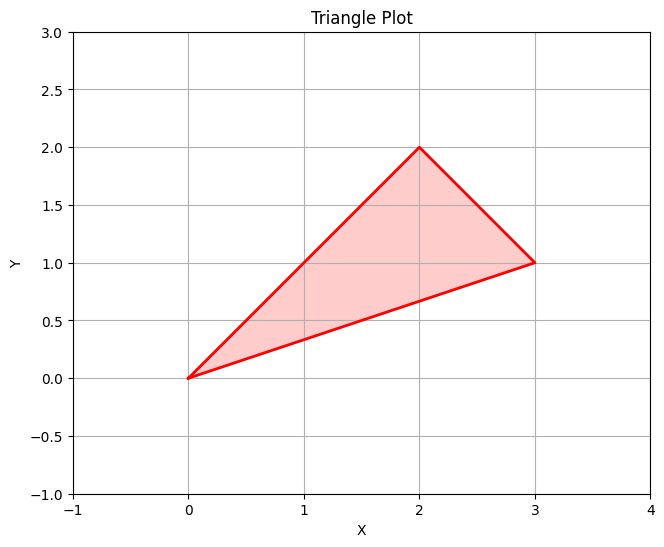

In [18]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Define the TurnerMembraneStiffness function (as previously shown)

# Define the coordinates and Emat
ncoor = [(0, 0), (3, 1), (2, 2)]
Emat = 8 * np.array([[8, 2, 0], [2, 8, 0], [0, 0, 3]])
h = 1.0
numer = False

Ke = TurnerMembraneStiffness(ncoor, Emat, h, numer)
print("Ke=")
print(Ke)

# Calculate eigenvalues of Ke using SymPy
eigenvalues = sp.Matrix(Ke).eigenvals()
eigenvalues = [float(val.evalf()) for val in eigenvalues]
print("eigs of Ke=")
print(eigenvalues)

# Plot the triangle
triangle = np.array(ncoor + [ncoor[0]])
x, y = triangle[:, 0], triangle[:, 1]

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'r-', linewidth=2)
plt.fill(x, y, 'r', alpha=0.2)
plt.xlim(-1, 4)
plt.ylim(-1, 3)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Triangle Plot')
plt.grid(True)

plt.show()
